In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn-white')

In [3]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=LARGE_SIZE)     
plt.rc('axes', titlesize=MEDIUM_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE, dpi=300, figsize=(5,4) )  

In [4]:
path_to_data="../data2/"
path_to_results="../results2/"

In [5]:
plt_df=pd.read_csv(path_to_data+"Data_for_Figure4A.tsv",sep="\t",index_col=0)
plt_df.head()

,CancerType,Gender_sTP53m,GS_cases,HA_cases,GS_HA_anno,Cancer_order,BRCA1_alteration,BRCA2_alteration,ATM_alteration,RAD51B_alteration,...,RAD51D_alteration,RAD50_alteration,BLM_alteration,CHEK1_alteration,FANCL_alteration,RAD51_alteration,FANCI_alteration,FANCF_alteration,NBN_alteration,RAD52_alteration
P30001,SARC,Female_TP53wt,1.0,0.0,GS,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
P30010,PRAD,Male_TP53wt,1.0,0.0,GS,9,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
P30046,TGCT,Male_TP53wt,1.0,0.0,GS,11,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
P30050,TGCT,Male_TP53wt,1.0,0.0,GS,11,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
P30057,UCS,Female_TP53m,1.0,0.0,GS,13,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [6]:
from collections import Counter
cancer_count_sort=[x[0]  for x in Counter(plt_df["CancerType"]).most_common() ]
dict_cancer_order={ cancer:i for i,cancer in enumerate( cancer_count_sort)}
dict_cancer_order

{'OV': 0,
 'BRC': 1,
 'STES': 2,
 'LUSC': 3,
 'PRAD': 4,
 'BLCA': 5,
 'SARC': 6,
 'HNSC': 7,
 'TGCT': 8,
 'LIHC': 9,
 'LUAD': 10,
 'SKCM': 11,
 'UCEC': 12,
 'MESO': 13,
 'CRC': 14,
 'CESC': 15,
 'KRC': 16,
 'ACC': 17,
 'PAAD': 18,
 'GBM': 19,
 'UCS': 20,
 'CHOL': 21,
 'LGG': 22,
 'PCPG': 23,
 'THCA': 24}

In [7]:
plt_df["Cancer_order"]=[dict_cancer_order[ cancer] for cancer in plt_df["CancerType"] ]

In [8]:
plt_df_simple=plt_df.loc[:,plt_df.columns.str.contains("_alteration$")]

In [9]:
col_order=np.sum( plt_df_simple!=4).sort_values(ascending=False).index
col_order

Index(['BRCA1_alteration', 'BRCA2_alteration', 'ATM_alteration',
       'RAD51B_alteration', 'CDK12_alteration', 'CHEK2_alteration',
       'BRIP1_alteration', 'PALB2_alteration', 'FANCD2_alteration',
       'FANCC_alteration', 'RAD51C_alteration', 'ATR_alteration',
       'BARD1_alteration', 'FANCM_alteration', 'FANCA_alteration',
       'MRE11A_alteration', 'RAD51D_alteration', 'RAD50_alteration',
       'BLM_alteration', 'CHEK1_alteration', 'FANCL_alteration',
       'RAD51_alteration', 'FANCI_alteration', 'FANCF_alteration',
       'NBN_alteration', 'RAD52_alteration'],
      dtype='object')

In [25]:
plt_df=plt_df.sort_values(list(col_order)+["Cancer_order"]+["GS_cases"],
                               ascending=[True]*len(col_order)+[True,False])

In [26]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']

In [27]:
dict_cancer_counts_4groups={}

for cancer in cancer_count_sort:
    counts=[]
    tmp_df=plt_df[plt_df["CancerType"]==cancer]
    for group in groups:
        tmp_df2=tmp_df[ tmp_df["Gender_sTP53m"]==group]
        add=  len(tmp_df2) 
        counts.append(add)
    dict_cancer_counts_4groups[cancer]=counts
    
dict_cancer_counts_4groups

{'OV': [187, 0, 18, 0],
 'BRC': [99, 0, 90, 6],
 'STES': [3, 56, 9, 40],
 'LUSC': [5, 47, 2, 17],
 'PRAD': [0, 1, 0, 60],
 'BLCA': [4, 20, 7, 29],
 'SARC': [8, 6, 19, 21],
 'HNSC': [1, 28, 0, 20],
 'TGCT': [0, 0, 0, 47],
 'LIHC': [0, 8, 11, 26],
 'LUAD': [2, 2, 14, 19],
 'SKCM': [1, 4, 10, 20],
 'UCEC': [20, 0, 10, 0],
 'MESO': [0, 0, 4, 20],
 'CRC': [1, 8, 4, 3],
 'CESC': [2, 0, 13, 0],
 'KRC': [0, 0, 4, 10],
 'ACC': [1, 0, 8, 3],
 'PAAD': [0, 2, 1, 6],
 'GBM': [1, 3, 0, 5],
 'UCS': [5, 0, 1, 0],
 'CHOL': [0, 0, 3, 3],
 'LGG': [1, 2, 0, 1],
 'PCPG': [0, 0, 3, 1],
 'THCA': [0, 0, 2, 0]}

In [28]:
dict_number_color={0:"red",1:"blue",2:"green",3:"y",4:"whitesmoke"}

BRCA1
BRCA2
ATM
RAD51B
CDK12
CHEK2
BRIP1
PALB2
FANCD2
FANCC
RAD51C
ATR
BARD1
FANCM
FANCA
MRE11A
RAD51D
RAD50
BLM
CHEK1
FANCL
RAD51
FANCI
FANCF
NBN
RAD52


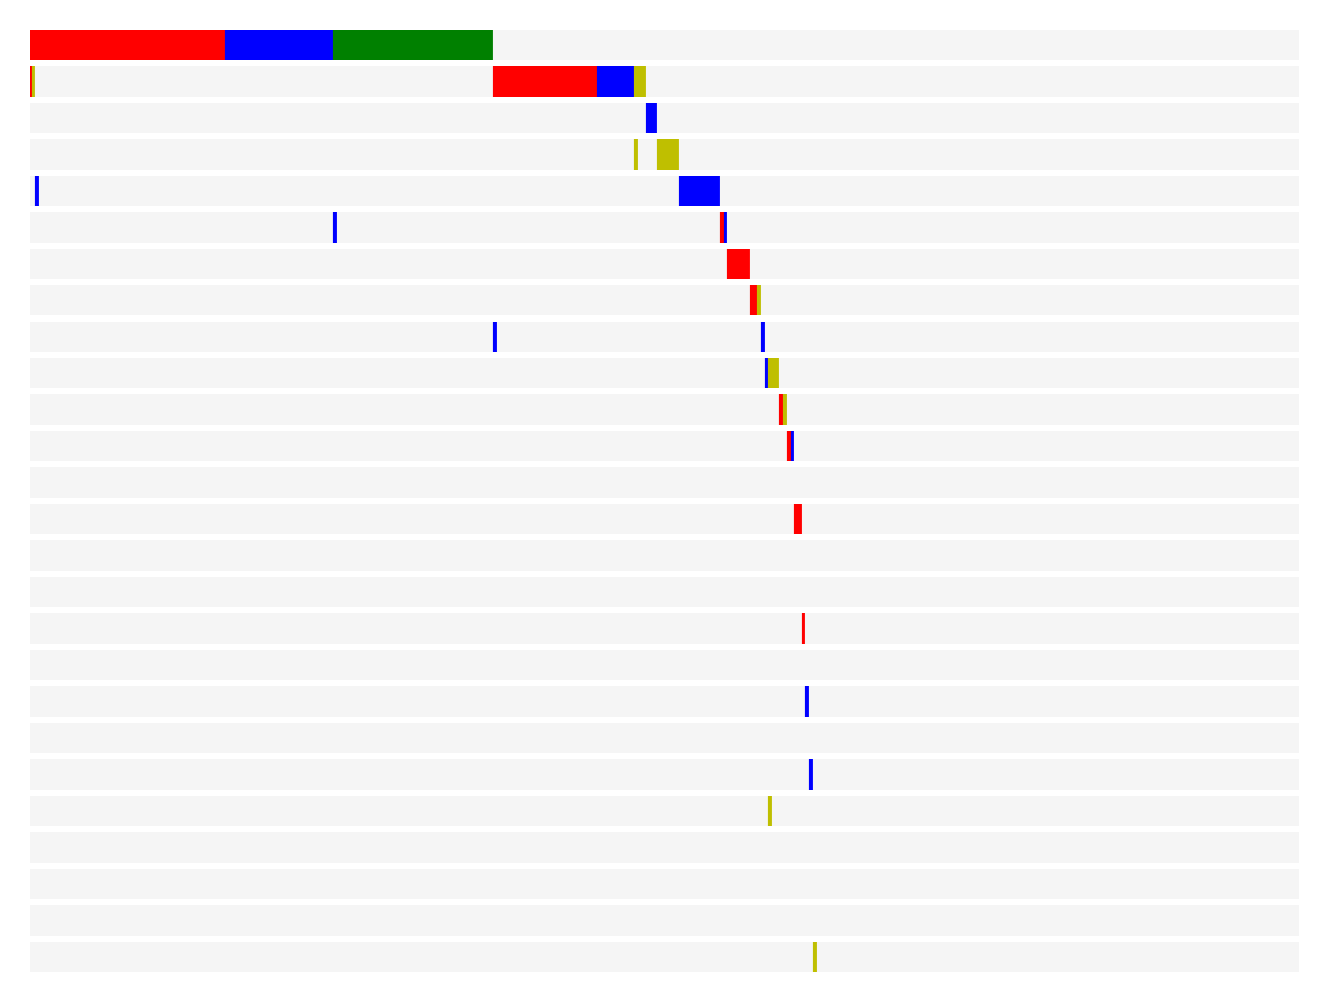

In [29]:
from matplotlib import patches

tmp_df=plt_df[plt_df["Gender_sTP53m"]==groups[0]]
N=len( tmp_df.index )
M=len( col_order )
fig = plt.figure(figsize=(0.016*N,0.16*M))
for i,col in enumerate(col_order ):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,number in enumerate( tmp_df[col] ):
        r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_number_color[number])
        ax.add_patch(r)
    ax.set_axis_off()
    
    print(col.replace("_alteration",""))

plt.savefig(path_to_results+"Figure4A_1_1.png",bbox_inches="tight")

In [30]:
dict_cancer_color={
'ACC': (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 'BLCA': (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 'BRC': (0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 'CESC': (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 'CHOL': (0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 'CRC': (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 'ESCA': (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 'GBM': (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 'HNSC': (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 'KRC': (1.0, 1.0, 0.6),
 'LGG': (0.8705882352941177, 0.6196078431372549, 0.8392156862745098),
 'LIHC': (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 'LUAD': (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 'LUSC': (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 'MESO': (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 'OV': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'PAAD': (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 'PCPG': (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 'PRAD': (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 'SARC': (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 'SKCM': (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 'STES': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'TGCT': (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 'THCA': (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 'UCEC': (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 'UCS': (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 'UVM': (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
'Others': 'grey'}

GS_cases
CancerType


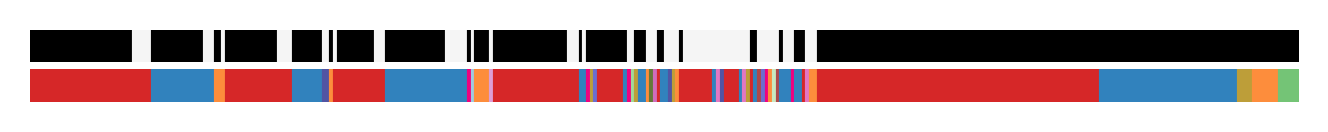

In [31]:
col_extra= ["GS_cases","CancerType"] 
N=len( tmp_df.index )
M=len(col_extra)
fig = plt.figure(figsize=(N*0.016,0.16*M))
for i,col in enumerate(col_extra):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col=="CancerType":
        for i,cancer in enumerate( tmp_df[col] ):
            r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_cancer_color[cancer] ) 
            ax.add_patch(r)
    elif col=="GS_cases":
        for i,number in enumerate( tmp_df[col] ):
            if number==1:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="k") 
                ax.add_patch(r)
            else:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="whitesmoke") 
                ax.add_patch(r)
    ax.set_axis_off()
    print(col)

plt.savefig(path_to_results+"Figure4A_1_2.png",bbox_inches="tight")

<ipython-input-17-0553b0596ccc>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incehs" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(path_to_results+"Figure4A_2_1.png",bbox_incehs="tight")


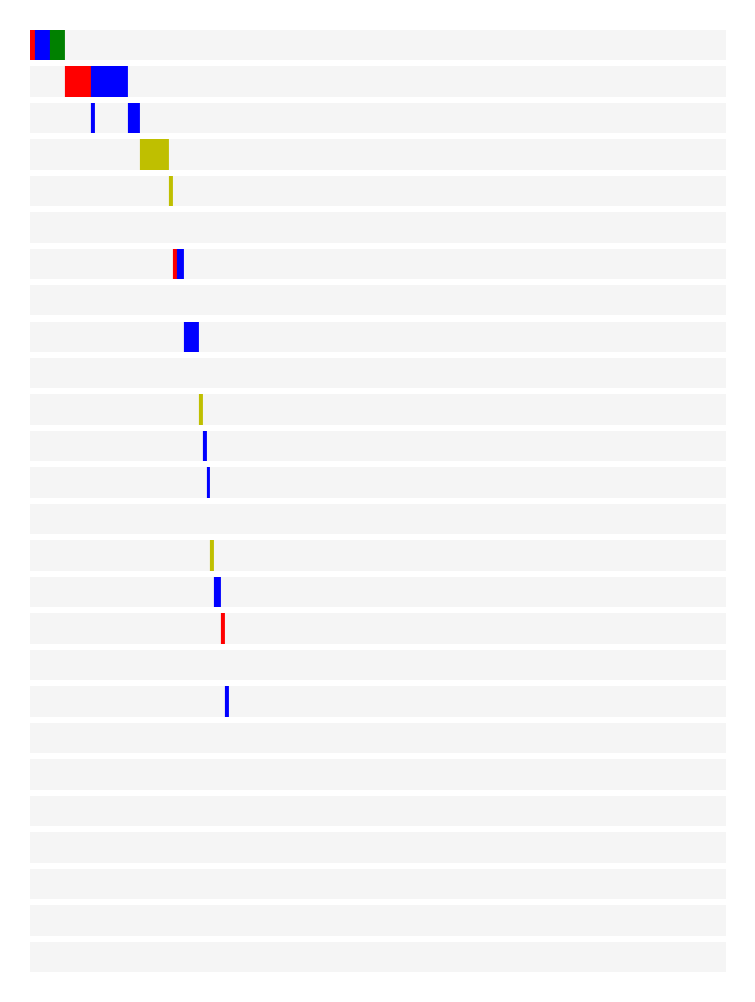

In [17]:
tmp_df=plt_df[plt_df["Gender_sTP53m"]==groups[1]]
N=len( tmp_df.index )
M=len( col_order )
fig = plt.figure(figsize=(0.016*N,0.16*M))
for i,col in enumerate(col_order ):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,number in enumerate( tmp_df[col] ):
        r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_number_color[number])
        ax.add_patch(r)
    ax.set_axis_off()
    #print(col.replace("_alteration",""))

plt.savefig(path_to_results+"Figure4A_2_1.png",bbox_inches="tight")

<ipython-input-18-06fc1a3855ed>:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incehs" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(path_to_results+"Figure4A_2_2.png",bbox_incehs="tight")


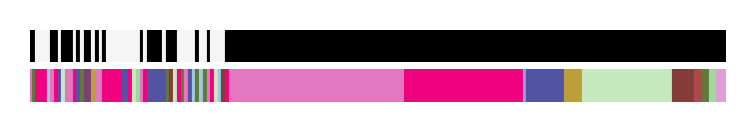

In [18]:
col_extra= ["GS_cases","CancerType"] 
N=len( tmp_df.index )
M=len(col_extra)
fig = plt.figure(figsize=(N*0.016,0.16*M))
for i,col in enumerate(col_extra):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col=="CancerType":
        for i,cancer in enumerate( tmp_df[col] ):
            r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_cancer_color[cancer] ) 
            ax.add_patch(r)
    elif col=="GS_cases":
        for i,number in enumerate( tmp_df[col] ):
            if number==1:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="k") 
                ax.add_patch(r)
            else:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="whitesmoke") 
                ax.add_patch(r)
    ax.set_axis_off()

plt.savefig(path_to_results+"Figure4A_2_2.png",bbox_inches="tight")

<ipython-input-19-e9777098a6de>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incehs" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(path_to_results+"Figure4A_3_1.png",bbox_incehs="tight")


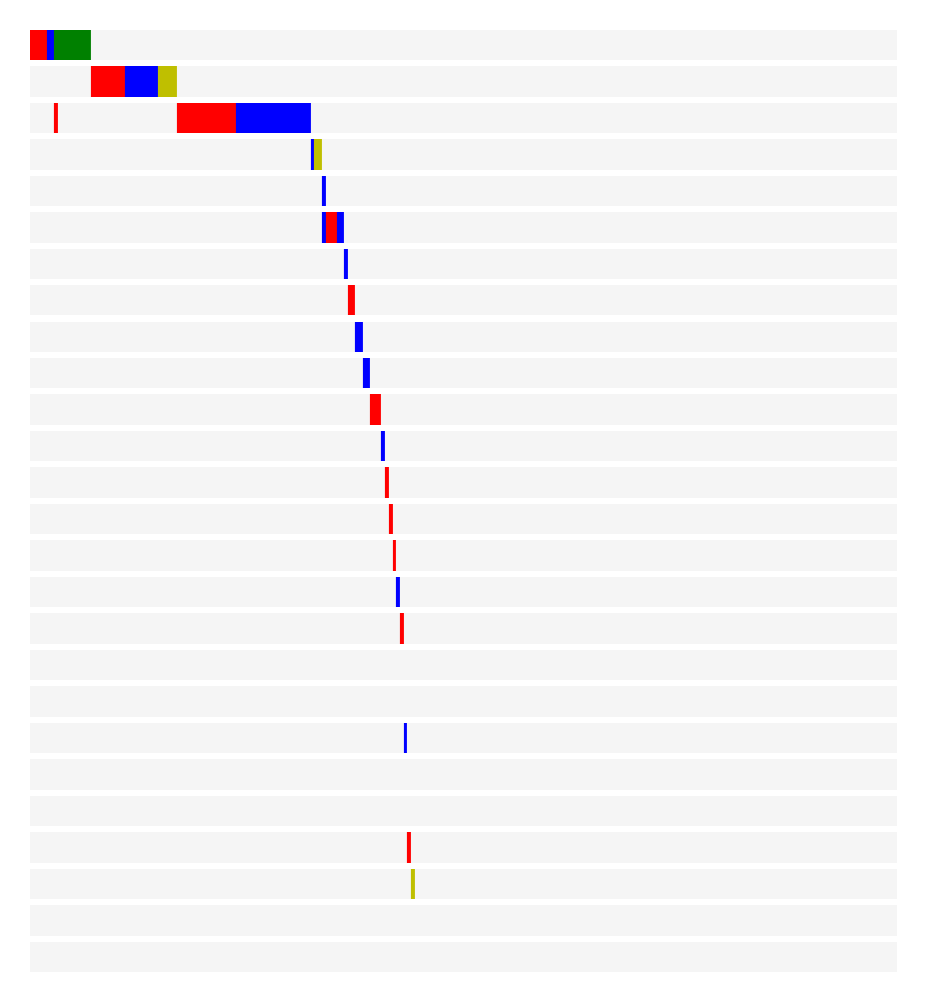

In [19]:
tmp_df=plt_df[plt_df["Gender_sTP53m"]==groups[2]]
N=len( tmp_df.index )
M=len( col_order )
fig = plt.figure(figsize=(0.016*N,0.16*M))
for i,col in enumerate(col_order ):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,number in enumerate( tmp_df[col] ):
        r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_number_color[number])
        ax.add_patch(r)
    ax.set_axis_off()
    #print(col.replace("_alteration",""))

plt.savefig(path_to_results+"Figure4A_3_1.png",bbox_inches="tight")

<ipython-input-20-bc4aaca390b8>:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incehs" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(path_to_results+"Figure4A_3_2.png",bbox_incehs="tight")


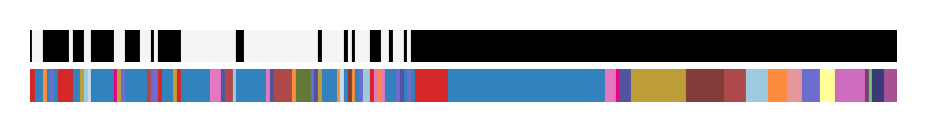

In [20]:
col_extra= ["GS_cases","CancerType"] 
N=len( tmp_df.index )
M=len(col_extra)
fig = plt.figure(figsize=(N*0.016,0.16*M))
for i,col in enumerate(col_extra):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col=="CancerType":
        for i,cancer in enumerate( tmp_df[col] ):
            r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_cancer_color[cancer] ) 
            ax.add_patch(r)
    elif col=="GS_cases":
        for i,number in enumerate( tmp_df[col] ):
            if number==1:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="k") 
                ax.add_patch(r)
            else:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="whitesmoke") 
                ax.add_patch(r)
    ax.set_axis_off()

plt.savefig(path_to_results+"Figure4A_3_2.png",bbox_inches="tight")

<ipython-input-21-e4f432a576e9>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incehs" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(path_to_results+"Figure4A_4_1.png",bbox_incehs="tight")


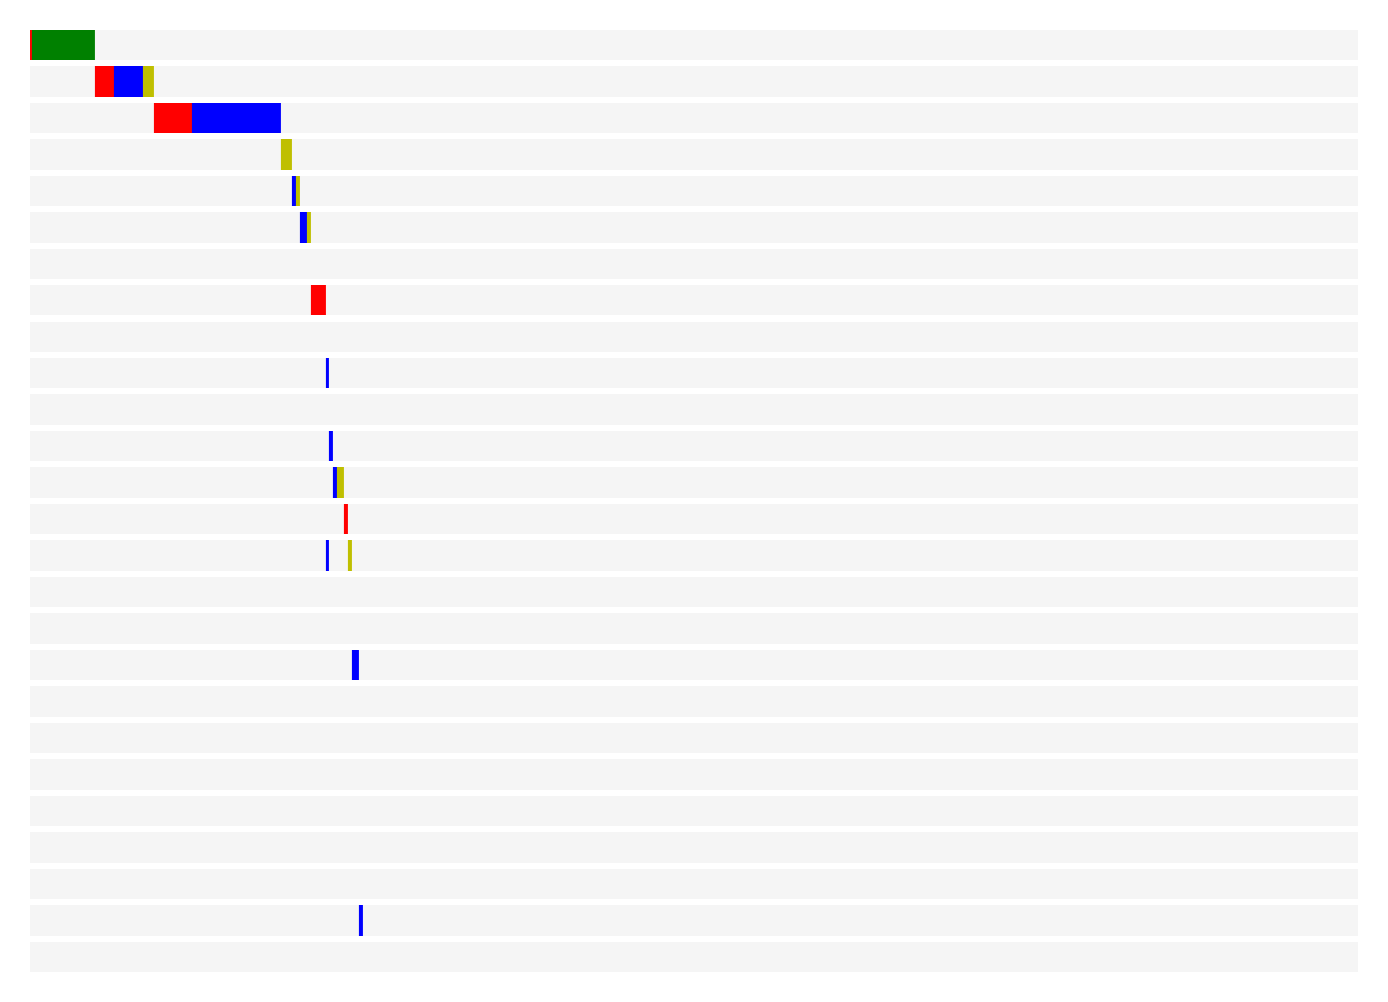

In [21]:
tmp_df=plt_df[plt_df["Gender_sTP53m"]==groups[3]]
N=len( tmp_df.index )
M=len( col_order )
fig = plt.figure(figsize=(0.016*N,0.16*M))
for i,col in enumerate(col_order ):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,number in enumerate( tmp_df[col] ):
        r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_number_color[number])
        ax.add_patch(r)
    ax.set_axis_off()
    #print(col.replace("_alteration",""))

plt.savefig(path_to_results+"Figure4A_4_1.png",bbox_inches="tight")

<ipython-input-22-643e69749991>:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incehs" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(path_to_results+"Figure4A_4_2.png",bbox_incehs="tight")


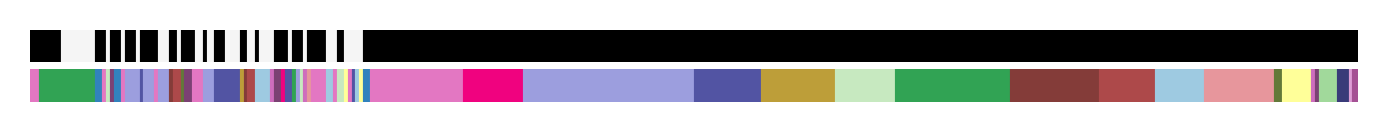

In [22]:
col_extra= ["GS_cases","CancerType"] 
N=len( tmp_df.index )
M=len(col_extra)
fig = plt.figure(figsize=(N*0.016,0.16*M))
for i,col in enumerate(col_extra):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col=="CancerType":
        for i,cancer in enumerate( tmp_df[col] ):
            r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_cancer_color[cancer] ) 
            ax.add_patch(r)
    elif col=="GS_cases":
        for i,number in enumerate( tmp_df[col] ):
            if number==1:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="k") 
                ax.add_patch(r)
            else:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="whitesmoke") 
                ax.add_patch(r)
    ax.set_axis_off()

plt.savefig(path_to_results+"Figure4A_4_2.png",bbox_inches="tight")

<ipython-input-23-1c7fb3f2fb04>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incehs" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(path_to_results+"Figure4A_5.png",bbox_incehs="tight")


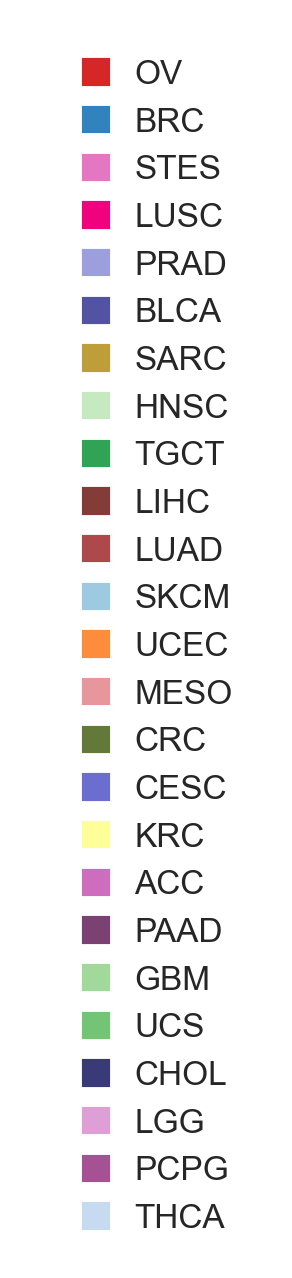

In [23]:
from matplotlib.patches import Patch

labels=cancer_count_sort
colors=[dict_cancer_color[cancer] for cancer in labels]
n_cancer=len(labels)
custom_legends =[  Patch(facecolor=colors[i],edgecolor=colors[i],
   			label=labels[i]   ) for i in range(n_cancer) ]

fig = plt.figure(figsize=(1,5))
ax = fig.add_subplot(111)
ax.legend(handles=custom_legends,fontsize=MEDIUM_SIZE,ncol=1,handlelength=0.7)
plt.gca().set_axis_off()
plt.savefig(path_to_results+"Figure4A_5.png",bbox_inches="tight")

In [24]:
for k,v in dict_cancer_counts_4groups.items():
    print(k+" ("+",".join( list(map(str,v)))+")")

OV (187,0,18,0)
BRC (99,0,90,6)
STES (3,56,9,40)
LUSC (5,47,2,17)
PRAD (0,1,0,60)
BLCA (4,20,7,29)
SARC (8,6,19,21)
HNSC (1,28,0,20)
TGCT (0,0,0,47)
LIHC (0,8,11,26)
LUAD (2,2,14,19)
SKCM (1,4,10,20)
UCEC (20,0,10,0)
MESO (0,0,4,20)
CRC (1,8,4,3)
CESC (2,0,13,0)
KRC (0,0,4,10)
ACC (1,0,8,3)
PAAD (0,2,1,6)
GBM (1,3,0,5)
UCS (5,0,1,0)
CHOL (0,0,3,3)
LGG (1,2,0,1)
PCPG (0,0,3,1)
THCA (0,0,2,0)
